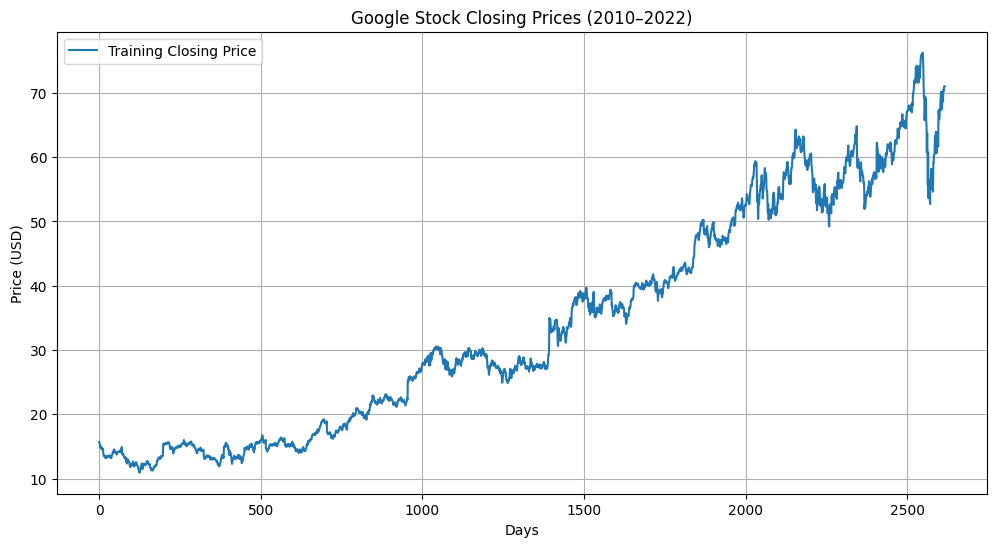

Epoch 1/20
80/80 [==============================] - 1s 8ms/step - loss: 0.0045
Epoch 2/20
80/80 [==============================] - 1s 8ms/step - loss: 3.5176e-04
Epoch 3/20
80/80 [==============================] - 1s 7ms/step - loss: 3.0499e-04
Epoch 4/20
80/80 [==============================] - 1s 7ms/step - loss: 2.5908e-04
Epoch 5/20
80/80 [==============================] - 1s 7ms/step - loss: 2.2399e-04
Epoch 6/20
80/80 [==============================] - 1s 7ms/step - loss: 2.2056e-04
Epoch 7/20
80/80 [==============================] - 1s 7ms/step - loss: 2.1963e-04
Epoch 8/20
80/80 [==============================] - 1s 7ms/step - loss: 2.0079e-04
Epoch 9/20
80/80 [==============================] - 1s 7ms/step - loss: 1.7735e-04
Epoch 10/20
80/80 [==============================] - 1s 7ms/step - loss: 1.9665e-04
Epoch 11/20
80/80 [==============================] - 1s 7ms/step - loss: 1.6946e-04
Epoch 12/20
80/80 [==============================] - 1s 7ms/step - loss: 1.8077e-04
Epoch

C:\Users\VARAD\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Mean Absolute Error (MAE): 6.66
Prediction Accuracy: 93.94%


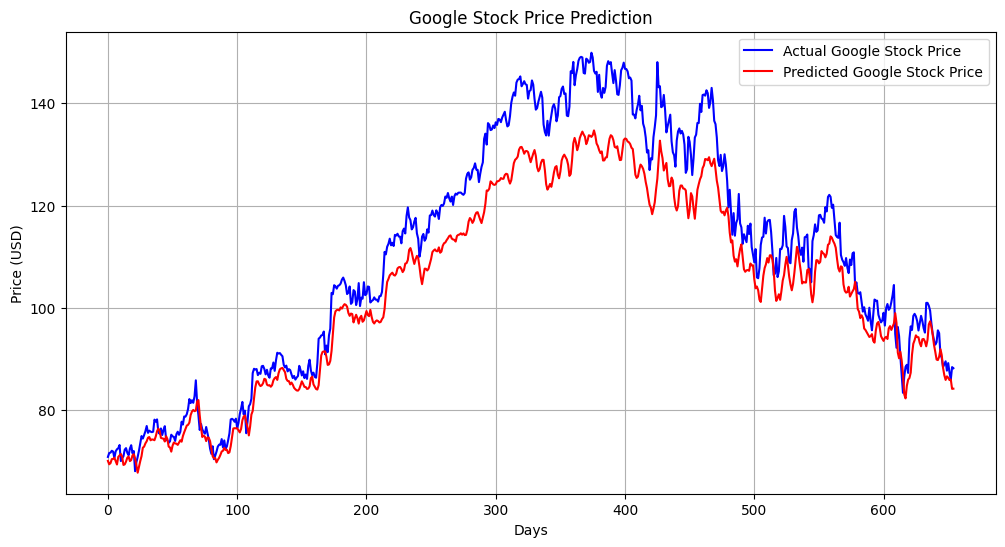

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Load the single CSV file
data_df = pd.read_csv('Google_Stock_Train (2010-2022).csv')

# Split the data into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(data_df, test_size=0.2, shuffle=False)

# Plot the training data
plt.figure(figsize=(12, 6))
plt.plot(train_df['Close'], label='Training Closing Price')
plt.title('Google Stock Closing Prices (2010–2022)')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['Close']])

X_train = []
y_train = []

# Prepare the training data with a time step of 60
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the RNN model
model = Sequential()
model.add(SimpleRNN(units=100, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prepare the testing data
total_data = pd.concat((train_df['Close'], test_df['Close']), axis=0)
inputs = total_data[len(total_data) - len(test_df) - 60:].values.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

X_test = []
for i in range(60, len(inputs_scaled)):
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the stock prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Evaluate the model
actual_prices = test_df['Close'].values
mae = mean_absolute_error(actual_prices, predicted_prices)
accuracy = 100 - (mae / np.mean(actual_prices) * 100)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Prediction Accuracy: {accuracy:.2f}%')

# Plot the actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_df['Close'].values, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
